# 4.18.44 Machine Learning Foundations 2

### Multiple Linear Regression

The type of regression that we've seen so far is called **simple linear regression**, because it studies the relationship between one dependent variable $y$ and one predictor variable $X$. Sometimes you may want to use several independent variables $x_1, x_2, ..., x_n$ to predict the response variable $y$, in such cases we talk about **multiple linear regression**. 

#### Assumptions

There are some **important assumptions** to be aware of when doing multiple regression: 

- there is a *linear relationship* between both the dependent and independent variables; 
- there is *no major correlation* between the independent variables. 
- other more technical assumptions are [listed here](https://en.wikipedia.org/wiki/Linear_regression#Assumptions)

#### The Model 

The general model for multiple linear regression is: 

$$
    y = b_0 + b_1x_1 + b_2x_2 + ... + b_px_p + \epsilon
$$

Since we're now working with more than one independent variable, we will have a matrix of predictors $X$ (containing the $x_1, x_2, ... x_p$ feature vectors), a set of parameters $b = [b_0, b_1, b_2, ..., b_p]$ as well as one vector $y$ containing the response variable. The previous equation can be rewritten in the following algebraic formulation: 

$$
    y = b^TX
$$

where: 

- $X$ is a $n \times p$ matrix containing $n$ observations and $p$ predictors
- $b$ is a vector of length $p$ containing the regression coefficients
- $y$ is a vector containing the $n$ response values

Finally, the set of estimated parameters $\hat{b}$ that **minimise the sum of squared residuals** is given by the following equation:  

$$
    \hat{b} = (X^TX)^{-1}X^Ty
$$

You can find the complete derivation of the $\hat{b}$ parameter estimate at [this page](https://en.wikipedia.org/wiki/Linear_regression#Least-squares_estimation_and_related_techniques).

We can easily do multiple regression with `statsmodels`, in fact we just need to specify a new $X$ object containing all the predictors we want to include. Let's use the same `penguins` example as before, but this time we want to predict the `body_mass_g` variable with the help of the following three independent variables: `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`.

In [5]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [6]:
df = sns.load_dataset('penguins')
df = df[~pd.isna(df.flipper_length_mm)]
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [7]:
Y = df['body_mass_g']
X = df[['bill_length_mm','bill_depth_mm','flipper_length_mm']]
X = sm.add_constant(data=X)   # add a constant to the model
model_mr = sm.OLS(endog=Y,exog=X)
results_mr = model_mr.fit()

In [8]:
results_mr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     359.7
Date:                Fri, 19 Aug 2022   Prob (F-statistic):          8.19e-105
Time:                        16:21:02   Log-Likelihood:                -2526.7
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     338   BIC:                             5077.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6424.7647    561.469    -11.443      0.000   -7529.179   -5320.351
bill_length_mm        4.1618      5.329      0.781      0.435      -6.321      14.644
bill_depth_mm        20.0495     13.694      1.464      0.144      -6.887      46.986
flipper_length_mm    50.2692      2.477     20.293      0.000      45.397      55.142
==============================================================================
Omnibus:                        5.263   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                5.129
Skew:                           0.298   Prob(JB):                       0.0770
Kurtosis:                       3.065   Cond. No.                     5.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Output Interpretation 

Let's look closely at our results. A first **warning bell** comes from the R-squared statistic: it is now $R^2 = 0.76$ and, if you remember from our simple regression exercise, when we modelled the body mass using only the penguin's flipper length, we got an $R^2 = 0.759$. So this means that **adding two more predictors** helped increase the explained variation by only 0.001, which is to say, it **did not help improving the model at all**. 

Furthermore, if we look at the **p-values of the regression coefficients**, we can clearly see that `bill_length_mm` and `bill_depth_mm` are not statistically significant (as the p-values are greater than the significance threshold $\alpha = 0.05$). 

If you remember the "Assumptions" section, we said that the predictors should have a linear relationship with the dependent variable, but they should not be strongly correlated with each other. Let's produce a **correlation matrix** to investigate this assumption.

In [9]:
df[['body_mass_g','bill_length_mm','bill_depth_mm','flipper_length_mm']].corr()

,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm
body_mass_g,1.000000,0.595110,-0.471916,0.871202
bill_length_mm,0.595110,1.000000,-0.235053,0.656181
bill_depth_mm,-0.471916,-0.235053,1.000000,-0.583851
flipper_length_mm,0.871202,0.656181,-0.583851,1.000000


We can immediately see that there is a strong correlation between `flipper_length_mm` and `bill_length_mm`, which goes against our initial assumption. When this happens we talk about **[multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity)**, where the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. 

Multicollinearity does not reduce the predictive power or reliability of the model as a whole, but it may give invalid results about any individual predictor, or about which predictors are redundant with respect to others. 

In the context of multiple regression, there are various ways to detect multicollinearity, such as the **[Variance Inflation Factor](https://en.wikipedia.org/wiki/Variance_inflation_factor)** (VIF) and the **[Condition Number](https://en.wikipedia.org/wiki/Condition_number)**. We won't go into the details of either, but you should know that the latter is part of the regression's `.summary()` output and you can also find a warning in the "Notes" section, cautioning about multicollinearity due to a large value of the Condition Number. 

#### Remarks

So, what do we do in such cases? There are different courses of action that can be taken: 

- our first model with only one predictor was quite good, we could stop there and use it for our predictions; 
- we can't use the multiple regression model as is, since it suffers from multicollinearity, some options are: 
    - insert/remove one new predictor at a time and checking if the multicollinearity problem is still present; 
    - search for new features or create ([engineer](https://en.wikipedia.org/wiki/Feature_engineering)) your own; 
    - this particular data has still all species grouped at the same level, it could be worth trying to repeat the regression analysis for each single species; 
- use different models that do not suffer from the multicollinearity problem. 

#### Adjusted R-squared

You may have noticed from the regression summary outputs that next to the R-squared is always reported a similar statistic called **Adjusted R-squared**. This is a variation that takes into consideration **how many independent variables** are present in the model and **penalises the goodness of fit score** as the number of predictors increases. 

This is an important point, because **R-squared always increases** (artificially) as you add predictors to the model, even if they don't have any logical sense (random noise) or predictive value. Adjusted R-squared attempts to correct for this overestimation by **being penalised if a specific effect does not improve the model.** 

$$
    \text{Adj. }R^2 = 1 - \frac{(1-R^2)(n-1)}{n-p-1}
$$

where: 
- $R^2$ is the R-squared
- $n$ is the number of observations
- $p$ is the number of predictors

### Overfitting

A frequent problem that comes up in many machine learning algorithms(including regression analysis), is **overfitting**. As a limit case, if there are p variables in a linear regression with p data points, the fitted line can go exactly through every point. 

Consider the following trivial example, where we have 10 data points and we fit a **[polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression)** of 10th degree to the data. This means that the regression equation will be non linear and will have the follwing form: 

$$
    y = b_0 + b_1x + b_2x^2 + b_3x^3 + ... + b_9x^9 + b_{10}x^{10}
$$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
def poly_reg_plot(n): 
    x = np.arange(0, n)
    y = np.random.randint(1, 150, n)
    
    if n<= 10: 
        poly = PolynomialFeatures(degree=n, include_bias=False)
    else: 
        poly = PolynomialFeatures(degree=10, include_bias=False)
    poly_features = poly.fit_transform(x.reshape(-1, 1))
    
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y)
    y_predicted = poly_reg_model.predict(poly_features)
    
    plt.figure(figsize=(10, 6))
    title = "Polinomial regression of degree: " + str(n)
    plt.title(title, size=16)
    plt.scatter(x, y)
    plt.plot(x, y_predicted, "r--")
    plt.show()

In [10]:
poly_reg_plot(10)

NameError: name 'poly_reg_plot' is not defined

More generally, given a large set of independent variables that have no relation to the dependent variable being predicted, some of them will in general be falsely found to be statistically significant and therefore they may be kept in the model. This would cause an overfitting the model.

In simple terms, **overfitting** happens when **a model learns the details and the noise of the data** it has been trained on. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. 

This is a problem because the model will have a great fit to the data (eg: very high R-squared), but it **won't be able to generalise well** its learnings to new data. Therefore when it will be used to make predictions on new data, it's **accuracy will be far worse**.

> Imagine you have to take a **physics exam** and you've been given the questions and answers to the last test, so you study it and memorise every single question that appeared in the last exam. Test day arrives and, as it happens, most of the **questions are different** from the previous test; since you've focussed on the details of the previous test, **your knowledge of the subject is not able to generalise** to new questions. You have overfitted your knowledge to the last exam and therefore will score poorly in the new test. 

#### Training and Test Sets

When you're creating a model and you want to evaluate its performace, it's good practice to always **[divide your data](https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets)** into two sets: 
- a **training** data set
- a **test** data set

You will want to keep more data available for the training phase, so a **rule of thumb** is to set apart about **30% of the data for testing** (a.k.a holdout sample). There shouldn't be any major structural differences between training and validation sets, so a **random split** is applied to the whole dataset. 

<img src="img/train-test-set.png" width="700">

The `sklearn` library has a module `model_selection` which contains the `train_test_split()` function (check out the [documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)), which, as the name suggests, *splits arrays or matrices into random train and test subsets*.

> And what about the **[validation set](https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets#Validation_data_set)**? Some machine learning models have several parameters (or hyperparameters) that need to be tuned in order to improve the model's performace and accuracy, therefore a validation data set is used to test the tuning of such hyperparameters. An example of an hyperparameter is the number of hidden units in each layer of an artificial neural network. 

### Case Study: WHO Life Expectancy

Let's train a multiple linear regression model with this new concept of training and test sets in mind on a new dataset. The data con be found in the `data` folder and comes from this [Kaggle page](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who), it includes WHO data on the health status as well as many other related factors for a list of many countries in the world. 

In [11]:
df = pd.read_csv('data/who-life-expectancy.csv')
df.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [12]:
print('Number of countries:', len(df.Country.unique()))

Number of countries: 193


In [13]:
df.Year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

The dataset contains **2,938 observations** relative to **193 countries** across **16 years** (from 2000 to 2015). There are some `nan` values: 
- we remove the records that have `nan` values for the dependent variable; 
- we replace with zeros the `nan` values of the predictors. 

Also, since this is a temporal dataset, we select only the last year of available observations, that is, data relative to the year 2015. 

In [14]:
df = df[~pd.isna(df['Life expectancy '])]

In [15]:
df = df.fillna(0)

In [16]:
# rename columns that have leading and trailing spaces 
df.columns = ['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
               'Infant Deaths', 'Alcohol', 'Pct Expenditure', 'Hepatitis B',
               'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Tot expenditure',
               'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
               'Thinness 1-19 years', 'Thinness 5-9 years',
               'Income composition of resources', 'Schooling']

In [17]:
df15 = df[df.Year==2015]
df15.shape

(183, 22)

After these initial data cleaning steps, we're left with the following `df15` DataFrame, containing 183 observations and 22 variables. 
> **Objective**: we want to predict the country's `Life expectancy` using other variables in the dataset as predictors.

A good starting point is to **look at the correlation** between the dependent variable $y$ and all potential (numeric) predictors $X$; two good tools at our disposal to help us in this task are: 
- correlation matrix
- graphical analysis via scatterplot

In [18]:
df15.corr()['Life expectancy'].sort_values(ascending=False)

Life expectancy                    1.000000
Income composition of resources    0.627709
Schooling                          0.573656
BMI                                0.529359
Polio                              0.515602
Diphtheria                         0.500300
GDP                                0.417505
Alcohol                            0.174561
Hepatitis B                        0.129036
Pct Expenditure                    0.043964
Tot expenditure                   -0.015303
Population                        -0.061011
Measles                           -0.074617
Infant Deaths                     -0.241290
Under-five deaths                 -0.271921
Thinness 1-19 years               -0.450324
Thinness 5-9 years                -0.450567
HIV/AIDS                          -0.608345
Adult Mortality                   -0.779119
Year                                    NaN
Name: Life expectancy, dtype: float64

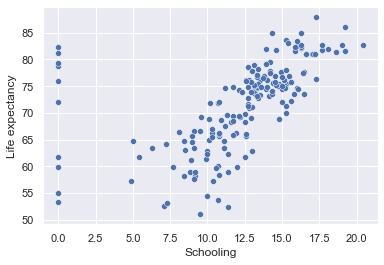

In [19]:
sns.scatterplot(x='Schooling', y='Life expectancy', data=df15)
plt.show()

As we said in the previous section, it is good practice to train the model on a subset of the data and to the test it on the rest of the data that the model has never seen before. The `train_test_split()` function from the `sklearn` library allows you to **easily create a train and test split** from your data, you just **need to specify** the $X$ matrix containing the **predictors**, the $y$ vector containing the **target variable** and the **desired proportion** of the test subset. 

First we define the matrix $X$ containing the predictors and the vector $y$ containing the target variable:

In [20]:
y = df15['Life expectancy']
X = df15[['Schooling', 'BMI', 'Adult Mortality', 'HIV/AIDS']]
X = sm.add_constant(X)

Then we apply the `train_test_split()` function to the predictors' matrix $X$ and to the responce vector $y$ and we get four objects in return: 
- **X_train**: random subset of 70% of the predictors' matrix $X$
- **X_test**: remaining 30% of the predictors' matrix $X$
- **y_train**: random subset of 70% of the response's vector $y$ (same random split as X_train of course)
- **y_test**: remaining 30% of the response's vector $y$

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We now run define an OLS linear regression model and fit it to the training split: 

In [22]:
model = sm.OLS(y_train,X_train)
results = model.fit()

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     87.22
Date:                Fri, 19 Aug 2022   Prob (F-statistic):           5.69e-35
Time:                        16:22:53   Log-Likelihood:                -363.64
No. Observations:                 128   AIC:                             737.3
Df Residuals:                     123   BIC:                             751.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              69.0460      1.815     38.048      0.000      65.454      72.638
Schooling           0.3586      0.107      3.357      0.001       0.147       0.570
BMI                 0.1084      0.022      4.860      0.000       0.064       0.153
Adult Mortality    -0.0399      0.005     -7.800      0.000      -0.050      -0.030
HIV/AIDS           -1.1186      0.347     -3.220      0.002      -1.806      -0.431
==============================================================================
Omnibus:                        5.720   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                8.141
Skew:                          -0.144   Prob(JB):                       0.0171
Kurtosis:                       4.202   Cond. No.                         889.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Performance Metrics

When evaluating a model (or comparing it to another one), it's always useful to choose a **performance (or accuracy) metric**. There are various accuracy metrics, depending on the type of model you're working with. One simple and popular metric for regression models is the **Mean Absolute Error (MAE)**, which is the average of the absolute difference between the observed response variable $y$ and the predicted values $\hat{y}$:

$$
    MAE = \frac{1}{n} \sum_{i=1}^{n} |y - \hat{y}|
$$

*Note: check out [this page](https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide) to find out about more accuracy metrics for regression (and classification) models.*

In [24]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

Let's use the MAE to assess the accuracy of the training model. It is good practice to have a benchmark model you to compare your model to, for example, the **average of the target variable** $\overline{y}$ is a good benchamrk, since you don't want your model to perform worse than that. 

Let's **print out the MAE** of the **naïve benchmark model** (the mean of the target variable) and that of the **training model**:

In [25]:
pred_train = results.predict(X_train)

print('Naïve Training MAE:', mae(y_train, np.mean(pred_train))) #naive mae
print('Training MAE:', mae(y_train, pred_train)) # mae

Naïve Training MAE: 6.71
Training MAE: 3.06


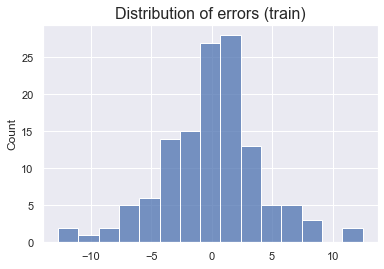

In [26]:
sns.histplot(y_train - pred_train).set_title("Distribution of errors (train)", size=16)
plt.show()

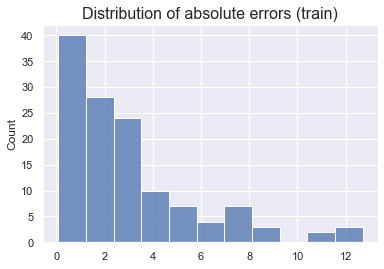

In [27]:
sns.histplot(np.abs(y_train - pred_train)).set_title("Distribution of absolute errors (train)", size=16)
plt.show()

So, up until now, **we have trained a regression model** on the training dataset, the next step is to **test its accuracy** on the test dataset. To do this, we use the predictors from the test set `X_test` to **make predictions with the model we just trained**, which we will then compare to the observed responses contained in `y_test`. 

Finally, we can **print out the MAE** of the **naïve benchmark model** (the mean of the target variable) and that of the **testing model**:

In [29]:
pred_test = results.predict(X_test)

print('Naïve Testing MAE:', mae(y_test, np.mean(pred_test))) #naive mae
print('Testing MAE:', mae(y_test, pred_test)) # mae

Naïve Testing MAE: 6.93
Testing MAE: 3.36


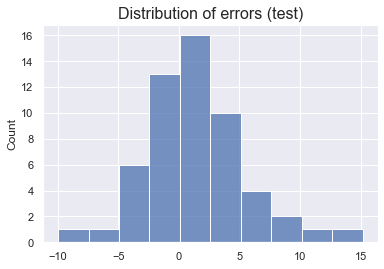

In [30]:
sns.histplot(y_test - pred_test).set_title("Distribution of errors (test)", size=16)
plt.show()

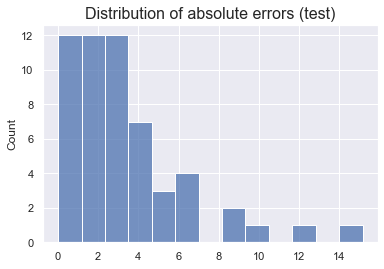

In [31]:
sns.histplot(np.abs(y_test - pred_test)).set_title("Distribution of absolute errors (test)", size=16)
plt.show()

**Comparing the training and testing MAE results**, we can conclude that the model doesn't overfit the data, in fact the Mean Absolute Errors between the two models are quite similar. **In case of overfitting**, we would have observed a larger and evident discrepancy between training and testing performance, with **larger errors** specifically on the testing predictions. 